In [52]:
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df = pd.read_csv('../debate_dataset.csv')
df.head()

,comment_id,post_id,debate_group,comment_user_name,commented_user_name,comment_body,comment_score
0,ki3k2mh,197vo6o,1,SurprysE,Odd_Sentence_2618,BOIA SI! Basta guardare da dove sono registrat...,11
1,ki5i0gd,197vo6o,1,SurprysE,the_white_cloud,"Non fa una grinza, ma metti in movimento il tu...",1
2,ki4y2a5,197vo6o,1,SurprysE,the_white_cloud,Sono bot che fanno un minimo di attività per e...,1
3,ki3r883,197vo6o,1,theseawillclaim,zombilives,"Ma immagino, anche il suo brand è sempre in ro...",12
4,ki3jhkw,197vo6o,2,Polaroid1793,TURBINEFABRIK74,Non ho mai visto una persona in vita mia camb...,3


In [54]:
post_id_dict = {}
dataframe_list = []
for post_id in df['post_id'].unique():
    dataframe = df[df['post_id'] == post_id]
    dataframe_list.append(dataframe)
    post_id_dict[post_id] = dataframe

In [55]:
def create_graph_from_dataframe(dataframe):
    graph = ig.Graph(directed=True)
    graph.add_vertex(name='root', label='root')
    for comment in dataframe.iterrows():
        if comment[1]['comment_user_name'] not in graph.vs['name']:
            graph.add_vertex(name=comment[1]['comment_user_name'], label=comment[1]['comment_user_name'])
        if comment[1]['commented_user_name'] not in graph.vs['name']:
            graph.add_vertex(name=comment[1]['commented_user_name'], label=comment[1]['commented_user_name'])
        graph.add_edge(comment[1]['comment_user_name'], comment[1]['commented_user_name'])
    
    graph.delete_vertices('root')
    return graph

post_id_graph = {}
for dataframe in dataframe_list:
    graph = create_graph_from_dataframe(dataframe)
    post_id_graph[dataframe['post_id'].iloc[0]] = graph

# Metriche di valutazione dei grafi di dibattitio

## Metriche sul POST

### Calcolo dell' average degree
Calcolando l'average degree di ciascun post, è possibile farsi un'idea generale di quanto gli utenti tendono ad interagire tra di loro 

In [56]:
def degree_distribution(graph):
    degree = graph.degree()
    n = graph.vcount()
    degree = np.array(degree)

    return 1/n * sum(degree)

### Distribuzione dei gradi
Questo grafico ci permette di osservare la distribuzione dei gradi di ogni nodo all'interno del grafo, offrendo una visione chiara del livello di interazione degli utenti. **Qual è la percentuale di utenti che hanno interagito poco/tanto con il post?**

In [57]:
def compute_degree_distribution(graph):
    degree = graph.degree()
    x = np.unique(degree)
    degree = np.array(degree)
    y = []
    for i in x:
        y.append(sum(degree == i)/ len(degree)) 
    return x, y

Post:197vo6o as average degree of 3.0625
Post:19aeo2k as average degree of 3.4545454545454546
Post:1b6cg4q as average degree of 4.777777777777778
Post:1cwqkqe as average degree of 5.029411764705882
Post:1bulhj9 as average degree of 5.092783505154639
Post:1d5h5h6 as average degree of 4.3896103896103895
Post:17z2hci as average degree of 5.663157894736842
Post:17lese9 as average degree of 5.069767441860465
Post:10v8sey as average degree of 4.92929292929293


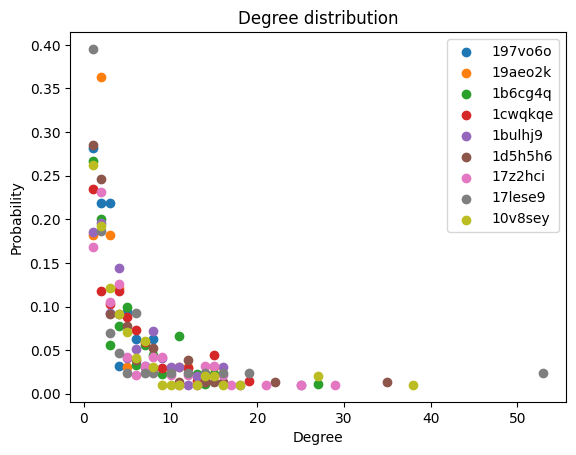

In [58]:
for post_graph in post_id_graph:
    print(f'Post:{post_graph} as average degree of {degree_distribution(post_id_graph[post_graph])}')
    x, y = compute_degree_distribution(post_id_graph[post_graph])
    plt.scatter(x, y)
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.title('Degree distribution')

plt.legend(post_id_graph.keys())
plt.show()

## Metriche sul Dibattito

### Coefficiente di clustering medio
Tramite il coefficiente di clustring medio possiamo ottenere una misura golbale del grado di coesione degli utenti all'interno della dibattito, ovvero quanto gli utenti hanno interagito tra di loro all'interno della discussione in questione.

In [59]:
def compute_average_clustering_coefficient(graph):
    return graph.transitivity_undirected()

In [61]:
for post_df in post_id_dict.values():
    for debate_id in post_df['debate_group'].unique():
        debate_df = post_df[post_df['debate_group'] == debate_id]
        graph = create_graph_from_dataframe(debate_df)
        print(f'Post:{post_df["post_id"].iloc[0]} Debate:{debate_id} has average clustering coefficient of {compute_average_clustering_coefficient(graph)}')

Post:197vo6o Debate:1 has average clustering coefficient of 0.0
Post:197vo6o Debate:2 has average clustering coefficient of nan
Post:197vo6o Debate:3 has average clustering coefficient of 0.0
Post:197vo6o Debate:4 has average clustering coefficient of 0.0
Post:19aeo2k Debate:5 has average clustering coefficient of 0.0
Post:19aeo2k Debate:6 has average clustering coefficient of 0.0
Post:19aeo2k Debate:2 has average clustering coefficient of 0.0
Post:19aeo2k Debate:3 has average clustering coefficient of nan
Post:19aeo2k Debate:7 has average clustering coefficient of 0.0
Post:19aeo2k Debate:4 has average clustering coefficient of 0.0
Post:19aeo2k Debate:8 has average clustering coefficient of nan
Post:1b6cg4q Debate:9 has average clustering coefficient of 0.04245283018867924
Post:1b6cg4q Debate:6 has average clustering coefficient of 0.0
Post:1b6cg4q Debate:10 has average clustering coefficient of 0.0
Post:1b6cg4q Debate:11 has average clustering coefficient of nan
Post:1b6cg4q Debate:1 